In [1]:
import tensorflow.keras.applications.nasnet as nasnet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
import numpy as np

# Load pre-trained NASNetLarge model (excluding the top fully connected layers)
base_model = nasnet.NASNetLarge(weights='imagenet')

# Function to extract features from a video frame
def extract_frame_features(frame):
    img = image.img_to_array(frame)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)  # Preprocess input frame

    features = base_model.predict(img)  # Extract features using NASNetLarge model

    return features.flatten()  # Flatten the features to a 1D array

# Rest of your code for video frame extraction and feature extraction

import cv2

video_path = './Dataset/test/videos/_fZbAxSSbX4_0-5-rgb_front.mp4'
cap = cv2.VideoCapture(video_path)

video_frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Pre-processing: Resize the frame to a fixed size
    resized_frame = cv2.resize(frame, (331, 331))  # Replace width and height with your desired values

    video_frames.append(resized_frame)

cap.release()


video_features = []
for frame in video_frames:
    features = extract_frame_features(frame)
    video_features.append(features)

video_features = np.stack(video_features)  # Stack the features into a numpy array
print(video_features.shape)  # Print the shape of extracted features


1/1 [==============================] - 0s 219ms/step
(47, 1000)


In [2]:
# for frame_features in video_features:
#     print(frame_features)

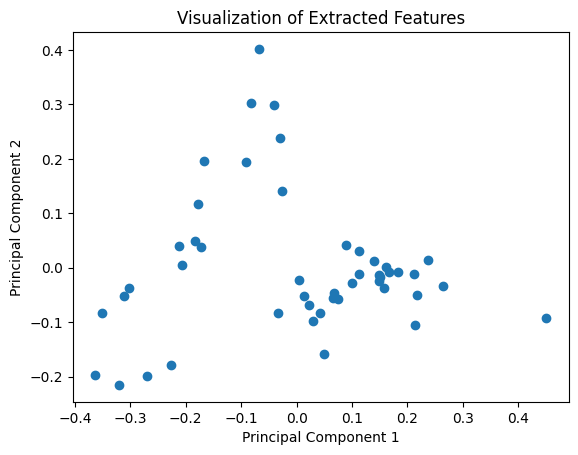

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the features to 2 dimensions
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(video_features)

# Plot the reduced features
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Extracted Features')
plt.show()


In [5]:
import cv2

video_path = './Dataset/test/videos/_fZbAxSSbX4_1-5-rgb_front.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties (width, height, FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec for the output video file
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create VideoWriter object to save the grayscale frames as a video
output_path = './output_video.mp4'
output = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Write the grayscale frame to the output video file
    output.write(gray_frame)

cap.release()
output.release()
print('Output video saved successfully')
